In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
hepat = pd.read_csv('/content/drive/MyDrive/PFF_Epitech/Health/HepatitisCdata.csv')

In [3]:
pd.set_option('display.max_rows', 40)

# **DATA ANALYSIS**

## **A] EXPLORATION AND PREPARATION OF THE DATASET**


## **1/ Exploration**

In [4]:
hepat = hepat.drop(['Unnamed: 0'], axis=1)


In [5]:
hepat.sample(5)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
288,0=Blood Donor,62,m,39.6,42.7,31.3,30.9,13.5,7.17,3.81,89.0,16.3,64.8
160,0=Blood Donor,46,m,51.8,82.6,37.3,29.1,13.4,9.97,7.40,90.0,30.1,80.3
324,0=Blood Donor,33,f,44.3,74.0,49.7,52.3,8.5,6.49,3.34,73.0,44.7,73.8
464,0=Blood Donor,52,f,45.5,78.2,25.2,27.7,4.7,8.65,6.04,65.0,28.3,70.5
513,0=Blood Donor,59,f,40.0,68.4,13.2,20.3,8.2,9.10,6.38,63.0,16.3,71.9


### Count of Null Values

In [6]:
hepat.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [7]:
#### IDENTIFY THE ROWS WITH NaN VALUES
hepat[hepat.isna().any(axis=1)]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
121,0=Blood Donor,43,m,48.6,45.0,10.5,40.5,5.3,7.09,NaN,63.0,25.1,70.0
319,0=Blood Donor,32,f,47.4,52.5,19.1,17.1,4.6,10.19,NaN,63.0,23.0,72.2
329,0=Blood Donor,33,f,42.4,137.2,14.2,13.1,3.4,8.23,NaN,48.0,25.7,74.4
413,0=Blood Donor,46,f,42.9,55.1,15.2,29.8,3.6,8.37,NaN,61.0,29.0,71.9
424,0=Blood Donor,48,f,45.6,107.2,24.4,39.0,13.8,9.77,NaN,88.0,38.0,75.1
433,0=Blood Donor,48,f,46.8,93.3,10.0,23.2,4.3,12.41,NaN,52.0,23.9,72.4
498,0=Blood Donor,57,f,48.4,94.4,2.5,39.6,2.3,8.84,NaN,82.0,6.4,76.8
540,1=Hepatitis,38,m,45.0,56.3,NaN,33.1,7.0,9.58,6.0,77.9,18.9,63.0
541,1=Hepatitis,19,m,41.0,NaN,87.0,67.0,12.0,7.55,3.9,62.0,65.0,75.0
545,1=Hepatitis,29,m,49.0,NaN,53.0,39.0,15.0,8.79,3.6,79.0,37.0,90.0


Given the distribution of Nan values, we can't drop those attached to hepatic illness. 

--> **After several upcoming Pandas aggregations, we'll try to replace these missing values with the least biased approximations**

## **2/ Preparation**

In [8]:
#### NO PATIENT '0' AS IT CARRIES MEANING IN MEDECINE 
hepat.index += 1

In [9]:
#### check main Dataframe
hepat.head(10)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
6,0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0
7,0=Blood Donor,32,m,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5
8,0=Blood Donor,32,m,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1
9,0=Blood Donor,32,m,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3
10,0=Blood Donor,32,m,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9


### a) First aggregation : Group with officially diagnosed hepatic illness


In [10]:
HC_pos_filter = (hepat['Category'] == '1=Hepatitis') | (hepat['Category'] == '2=Fibrosis' ) | (hepat['Category'] == '3=Cirrhosis' )
HC_pos = hepat[HC_pos_filter]

In [11]:
HC_pos.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
541,1=Hepatitis,38,m,45.0,56.3,NaN,33.1,7.0,9.58,6.00,77.9,18.9,63.0
542,1=Hepatitis,19,m,41.0,NaN,87.0,67.0,12.0,7.55,3.90,62.0,65.0,75.0
543,1=Hepatitis,23,m,47.0,19.1,38.9,164.2,17.0,7.09,3.20,79.3,90.4,70.1
544,1=Hepatitis,25,m,42.0,38.2,63.3,187.7,14.0,6.00,4.28,66.9,40.2,70.5
545,1=Hepatitis,27,m,45.0,27.5,10.5,37.8,10.0,8.77,3.20,55.2,35.9,74.5


In [12]:
#### MEAN OF AGE + BLOOD ANALYSIS FOR THE GROUP WITH HEPATIC ILLNESS
HC_pos_mean = HC_pos.mean()
HC_pos_mean

Age      48.426667
ALB      38.797297
ALP      62.733333
ALT      34.586486
AST      89.945333
BIL      32.413333
CHE       6.831867
CHOL      4.535139
CREA     99.533333
GGT     103.676000
PROT     73.275676
dtype: float64

### b) Second aggregation : Regular blood donor group

In [13]:
HC_neg_filter = (hepat['Category'] == '0=Blood Donor')# | (hepat['Category'] == '0s=suspect Blood Donor' )
HC_neg = hepat[HC_neg_filter].copy()

In [14]:
#### MEAN OF AGE + BLOOD ANALYSIS FOR THE REGULAR BLOOD DONOR GROUP
HC_neg_mean = HC_neg.mean()
print(HC_neg_mean)

Age     47.131332
ALB     42.238274
ALP     68.365103
ALT     26.631520
AST     26.549156
BIL      8.527580
CHE      8.398086
CHOL     5.494316
CREA    78.977486
GGT     29.036773
PROT    72.111257
dtype: float64


### c) Third aggregation : Variance of Hepatic illness group / Regular blood donor group


In [15]:
#num_cols = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']


In [16]:
Hepatitis = hepat.loc[hepat['Category'] == '1=Hepatitis']
Hep_mean = Hepatitis.mean()

Fibrosis = hepat.loc[hepat['Category'] == '2=Fibrosis']
Fib_mean = Fibrosis.mean()

Cirrhosis = hepat.loc[hepat['Category'] == '3=Cirrhosis']
Cir_mean = Cirrhosis.mean()

In [17]:
#### DATAFRAME PREPERATION FOR DATAVIZ
ill_diff = pd.concat([Hep_mean, Fib_mean, Cir_mean], axis=1, join='inner')
ill_diff = ill_diff.reset_index()
ill_diff.columns = ["index", "Hep_mean", "Fib_mean", "Cir_mean"]
ill_diff

,index,Hep_mean,Fib_mean,Cir_mean
0,Age,38.708333,52.333333,53.466667
1,ALB,43.833333,41.761905,32.482759
2,ALP,42.114286,37.841667,93.220833
3,ALT,26.900000,59.600000,22.970000
4,AST,75.733333,81.171429,107.456667
5,BIL,15.625000,13.428571,59.133333
6,CHE,9.283750,8.334762,3.818333
7,CHOL,5.099167,4.595500,4.008571
8,CREA,73.958333,73.490476,138.223333
9,GGT,92.579167,79.552381,129.440000


### d) Creation of a single dataframe with the mean of each group (+ ALT version) : 
- Hepaticly Sane (Blood Donor) 
- Hepatitis C
- Fibrosis
- Cirrhosis

In [18]:
result = pd.concat([HC_neg_mean, HC_pos_mean], axis=1, join='inner')
result = result.reset_index()
result.columns = ["index", "HC_neg_mean", "HC_pos_mean"]
result

,index,HC_neg_mean,HC_pos_mean
0,Age,47.131332,48.426667
1,ALB,42.238274,38.797297
2,ALP,68.365103,62.733333
3,ALT,26.631520,34.586486
4,AST,26.549156,89.945333
5,BIL,8.527580,32.413333
6,CHE,8.398086,6.831867
7,CHOL,5.494316,4.535139
8,CREA,78.977486,99.533333
9,GGT,29.036773,103.676000


In [19]:
result['Hep_mean'] = ill_diff['Hep_mean']
result['Fib_mean'] = ill_diff['Fib_mean']
result['Cir_mean'] = ill_diff['Cir_mean']

In [20]:
################ EXECUTE ONLY ONCE ################

result
##### DROP AGE (ONLY ONCE)
result.drop([0])

##### PIVOTING DF (ONLY ONCE)
result_test = result.T 
print(result_test)


                  0        1        2   ...       8        9        10
index            Age      ALB      ALP  ...     CREA      GGT     PROT
HC_neg_mean  47.1313  42.2383  68.3651  ...  78.9775  29.0368  72.1113
HC_pos_mean  48.4267  38.7973  62.7333  ...  99.5333  103.676  73.2757
Hep_mean     38.7083  43.8333  42.1143  ...  73.9583  92.5792     74.7
Fib_mean     52.3333  41.7619  37.8417  ...  73.4905  79.5524     76.1
Cir_mean     53.4667  32.4828  93.2208  ...  138.223   129.44  70.0517

[6 rows x 11 columns]


In [21]:
################ EXECUTE ONLY ONCE ################

######  SET ROW "index" AS INDEX (ONLY ONCE)
result_test = result_test.rename(columns=result_test.loc["index"])

###### DROP ROW "index" (ONLY ONCE)
result_test = result_test.iloc[1:]

###### CHECK y = MEANS AND PARAMS AS COLUMNS TITLES  
all_means = result_test.copy()

###### ONLY ONCE DROP "AGE" COLUMN
all_means = all_means.drop(['Age'], axis=1)

###### CHECK
all_means


,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
HC_neg_mean,42.2383,68.3651,26.6315,26.5492,8.52758,8.39809,5.49432,78.9775,29.0368,72.1113
HC_pos_mean,38.7973,62.7333,34.5865,89.9453,32.4133,6.83187,4.53514,99.5333,103.676,73.2757
Hep_mean,43.8333,42.1143,26.9,75.7333,15.625,9.28375,5.09917,73.9583,92.5792,74.7
Fib_mean,41.7619,37.8417,59.6,81.1714,13.4286,8.33476,4.5955,73.4905,79.5524,76.1
Cir_mean,32.4828,93.2208,22.97,107.457,59.1333,3.81833,4.00857,138.223,129.44,70.0517


In [22]:
all_means_test = all_means.reset_index(drop=False)
all_means_test

,index,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,HC_neg_mean,42.2383,68.3651,26.6315,26.5492,8.52758,8.39809,5.49432,78.9775,29.0368,72.1113
1,HC_pos_mean,38.7973,62.7333,34.5865,89.9453,32.4133,6.83187,4.53514,99.5333,103.676,73.2757
2,Hep_mean,43.8333,42.1143,26.9,75.7333,15.625,9.28375,5.09917,73.9583,92.5792,74.7
3,Fib_mean,41.7619,37.8417,59.6,81.1714,13.4286,8.33476,4.5955,73.4905,79.5524,76.1
4,Cir_mean,32.4828,93.2208,22.97,107.457,59.1333,3.81833,4.00857,138.223,129.44,70.0517


## **3/ Checking the most significant parameters (beyond blood samples)**

####a) Age

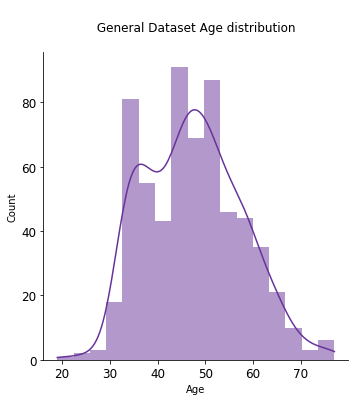

In [23]:
data = hepat['Age']

### AGE IS CONTINUOUS WHERE NOT GIVEN BY DATE
g_age = sns.displot(data, discrete = False, kde = True, color="rebeccapurple", edgecolor=None)
plt.title("\n General Dataset Age distribution \n")
#plt.xlabel("count", fontsize = 10)

plt.tick_params(axis = 'both', which = 'major', labelsize = 12)

plt.show()

There is a slight shortage of patients around 40 years old sample <br>
**but it appears to be adequately compensated in the overall distribution, by nearest neighbors values**

Let's check if we can identify relevant differences in blood sample parameters, between equally sized age groups: 
- 25% youngest 
- 25% younger middle aged
- 25% older middle aged
- 25% oldest

In [24]:
labels = ['25% youngest', '25% younger middle aged', '25% older middle aged', '25% older']
HC_neg['QuantilesLabelled'] = pd.qcut(HC_neg.loc[:, ('Age')],
                                          q=4,
                                          labels=labels,
                                          precision=0)
HC_neg.sample(10)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,QuantilesLabelled
465,0=Blood Donor,52,f,45.5,78.2,25.2,27.7,4.7,8.65,6.04,65.0,28.3,70.5,25% older middle aged
102,0=Blood Donor,41,m,38.5,63.9,34.3,43.4,9.6,6.80,4.13,90.0,11.4,64.1,25% younger middle aged
305,0=Blood Donor,66,m,40.6,79.6,27.0,28.0,10.1,10.88,5.48,76.0,29.8,71.8,25% older
223,0=Blood Donor,52,m,41.2,67.4,20.4,18.8,4.3,8.51,4.97,82.0,40.4,68.5,25% older middle aged
496,0=Blood Donor,56,f,33.2,54.3,15.5,22.8,8.0,5.61,3.87,55.0,19.1,63.1,25% older
425,0=Blood Donor,48,f,45.6,107.2,24.4,39.0,13.8,9.77,NaN,88.0,38.0,75.1,25% older middle aged
463,0=Blood Donor,51,f,47.4,117.3,62.1,30.4,3.8,10.43,6.59,86.0,69.3,71.0,25% older middle aged
152,0=Blood Donor,46,m,41.8,65.6,30.5,28.2,6.1,10.68,4.72,82.0,24.8,65.0,25% younger middle aged
275,0=Blood Donor,59,m,37.8,83.7,25.3,20.0,18.6,7.52,5.07,108.0,17.4,64.1,25% older
187,0=Blood Donor,49,m,39.1,62.1,23.8,19.6,3.5,9.19,4.82,85.0,19.4,69.8,25% older middle aged


In [25]:
### Select 25% youngest patients, among hepaticly sane population :
young_stack = HC_neg[HC_neg['QuantilesLabelled']== "25% youngest"]

### Calcul the mean for selected columns (parameters) : 
young_stack_mean = young_stack[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].mean()

### Check the result : 
young_stack_mean

ALB     42.803546
ALP     65.697163
ALT     28.441844
AST     26.646099
BIL      9.365957
CHE      8.340000
CHOL     5.072734
CREA    79.737589
GGT     26.643972
PROT    72.852482
dtype: float64

In [26]:
### Select the less young patients, among hepaticly sane population :
less_young_stack = HC_neg[HC_neg['QuantilesLabelled']== "25% younger middle aged"]
#print(less_young_stack)

### Calcul the mean for selected columns (parameters) : 
less_young_stack_mean = less_young_stack[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].mean()

### Check the result : 
less_young_stack_mean

ALB     42.358993
ALP     65.955396
ALT     26.528058
AST     26.978417
BIL      8.338849
CHE      8.286619
CHOL     5.457153
CREA    79.697842
GGT     26.763309
PROT    72.087770
dtype: float64

In [27]:
### Select the less old patients, among hepaticly sane population :
less_old_stack = HC_neg[HC_neg['QuantilesLabelled']== "25% older middle aged"]
#print(less_young_stack)

### Calcul the mean for selected columns (parameters) : 
less_old_stack_mean = less_old_stack[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].mean()

### Check the result : 
less_old_stack_mean

ALB     42.543333
ALP     71.431667
ALT     27.027500
AST     26.275000
BIL      8.249167
CHE      8.742667
CHOL     5.820763
CREA    78.233333
GGT     33.285833
PROT    72.260000
dtype: float64

In [28]:
### Select the oldest patients, among hepaticly sane population :
older_stack = HC_neg[HC_neg['QuantilesLabelled']== "25% older"]
#print(less_young_stack)

### Calcul the mean for selected columns (parameters) : 
older_stack_mean = older_stack[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].mean()

### Check the result : 
older_stack_mean

ALB     41.237594
ALP     70.945113
ALT     24.463158
AST     26.245113
BIL      8.087218
CHE      8.265263
CHOL     5.685000
CREA    78.090226
GGT     30.115789
PROT    71.215789
dtype: float64

In [29]:
################ EXECUTE ONLY ONCE ################

whole = pd.concat([young_stack_mean, less_young_stack_mean, less_old_stack_mean, older_stack_mean], axis=1, join='inner')

### INVERSE X/Y (ONLY ONCE) 
whole.T

### TEST
#whole

#print(whole.columns)

### RENAME COLUMNS
whole_new = whole.rename(columns = {0:'25% youngest', 1 : '25% less young', 2 : '25% less old', 3 : '25% oldest'})

### CHECK
print(whole_new)

whole_new_2 = whole_new.T
print(whole_new_2)

      25% youngest  25% less young  25% less old  25% oldest
ALB      42.803546       42.358993     42.543333   41.237594
ALP      65.697163       65.955396     71.431667   70.945113
ALT      28.441844       26.528058     27.027500   24.463158
AST      26.646099       26.978417     26.275000   26.245113
BIL       9.365957        8.338849      8.249167    8.087218
CHE       8.340000        8.286619      8.742667    8.265263
CHOL      5.072734        5.457153      5.820763    5.685000
CREA     79.737589       79.697842     78.233333   78.090226
GGT      26.643972       26.763309     33.285833   30.115789
PROT     72.852482       72.087770     72.260000   71.215789
                      ALB        ALP  ...        GGT       PROT
25% youngest    42.803546  65.697163  ...  26.643972  72.852482
25% less young  42.358993  65.955396  ...  26.763309  72.087770
25% less old    42.543333  71.431667  ...  33.285833  72.260000
25% oldest      41.237594  70.945113  ...  30.115789  71.215789

[4 rows 

In [30]:
print('\n')
print(whole_new)
print('\n')
print(whole_new_2)



      25% youngest  25% less young  25% less old  25% oldest
ALB      42.803546       42.358993     42.543333   41.237594
ALP      65.697163       65.955396     71.431667   70.945113
ALT      28.441844       26.528058     27.027500   24.463158
AST      26.646099       26.978417     26.275000   26.245113
BIL       9.365957        8.338849      8.249167    8.087218
CHE       8.340000        8.286619      8.742667    8.265263
CHOL      5.072734        5.457153      5.820763    5.685000
CREA     79.737589       79.697842     78.233333   78.090226
GGT      26.643972       26.763309     33.285833   30.115789
PROT     72.852482       72.087770     72.260000   71.215789


                      ALB        ALP  ...        GGT       PROT
25% youngest    42.803546  65.697163  ...  26.643972  72.852482
25% less young  42.358993  65.955396  ...  26.763309  72.087770
25% less old    42.543333  71.431667  ...  33.285833  72.260000
25% oldest      41.237594  70.945113  ...  30.115789  71.215789

[4 r

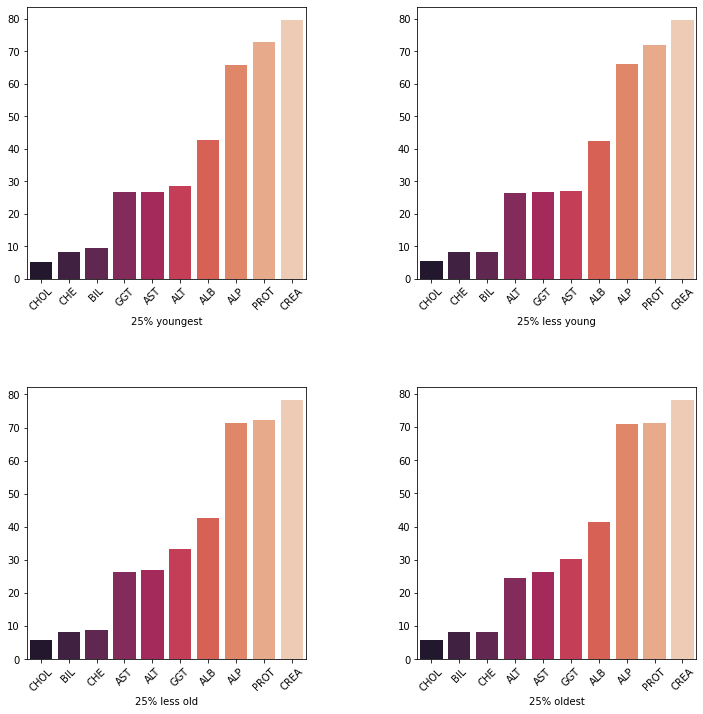

In [31]:
#### NOTE : THE COLUMN ORDER MAY VARY FROM A CHART TO ANOTHER BECAUSE SEABORN AUTOMATICALY SORT NUMERICAL VALUES 

sns.set_palette("rocket")
sns.color_palette("rocket")

fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 2, 1)
sns.barplot(x = whole_new_2.loc['25% youngest'], y = whole_new_2.loc['25% youngest'].values, palette="rocket", ax=ax)
ax.set_xticklabels(['CHOL', 'CHE', 'BIL', 'GGT', 'AST', 'ALT', 'ALB', 'ALP', 'PROT', 'CREA'], rotation=45)

ax = fig.add_subplot(2, 2, 2)
sns.barplot(x = whole_new_2.loc['25% less young'],y = whole_new_2.loc['25% less young'].values, palette="rocket", ax=ax)
ax.set_xticklabels(['CHOL', 'CHE', 'BIL', 'ALT', 'GGT', 'AST', 'ALB', 'ALP', 'PROT', 'CREA'], rotation=45)

ax = fig.add_subplot(2, 2, 3)
sns.barplot(x = whole_new_2.loc['25% less old'], y = whole_new_2.loc['25% less old'].values, palette="rocket", ax=ax)
ax.set_xticklabels(['CHOL', 'BIL', 'CHE', 'AST', 'ALT', 'GGT', 'ALB', 'ALP', 'PROT', 'CREA'], rotation=45)

ax = fig.add_subplot(2, 2, 4)
sns.barplot(x = whole_new_2.loc['25% oldest'], y = whole_new_2.loc['25% oldest'].values, palette="rocket", ax=ax)
ax.set_xticklabels(['CHOL','BIL', 'CHE', 'ALT', 'AST', 'GGT', 'ALB', 'ALP', 'PROT', 'CREA'], rotation=45)

plt.show()

**--> The Age factor, when studied in 4 quartiles, doesn't seem to affect significantly the overall blood test parameters** 

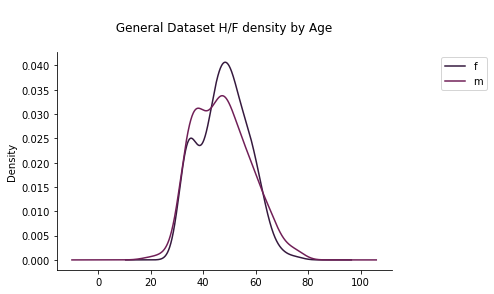

In [32]:
hepat.groupby('Sex').Age.plot(kind='kde', title="\n General Dataset H/F density by Age \n", fontsize=10)

sns.despine()
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1));
plt.show()



The density of sexual distribution in the dataset is adequate <br>
Let's dig a little deeper

#### b) Sex

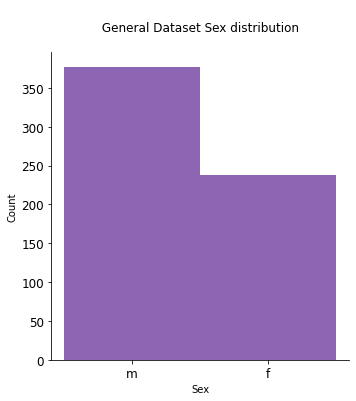

In [33]:
data = hepat['Sex']

g_sex = sns.displot(data, discrete = True, color="rebeccapurple", edgecolor=None)
plt.title("\n General Dataset Sex distribution \n")
#plt.xlabel("count", fontsize = 10)

plt.tick_params(axis = 'both', which = 'major', labelsize = 12)

plt.show()

The sample itself carries a bias,<br> **with a difference of more than 30%  between the Male and Female sample size**

**Let's check if there is an inherent (biological) bias in the blood test results :**

<u>On the Gamma-Glutamyl Transferase (GGT) parameter</u> : 

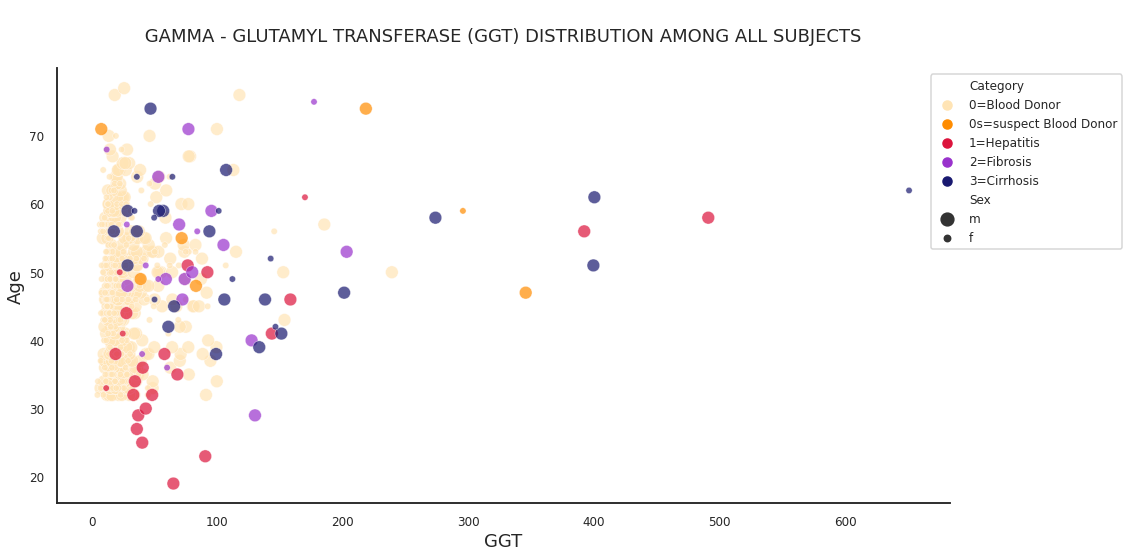

In [34]:

sns.set(style='white', context='talk')
plt.figure(figsize=(16, 8))
t = sns.scatterplot(data=hepat, x='GGT', y='Age', 
                alpha=0.7, hue='Category', palette = ['moccasin', 'darkorange', 'crimson', 'darkorchid', 'midnightblue'], size='Sex')
sns.despine()

plt.title("\n GAMMA - GLUTAMYL TRANSFERASE (GGT) DISTRIBUTION AMONG ALL SUBJECTS \n")

t.tick_params(axis = 'both', which = 'major', labelsize = 12)

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=12);

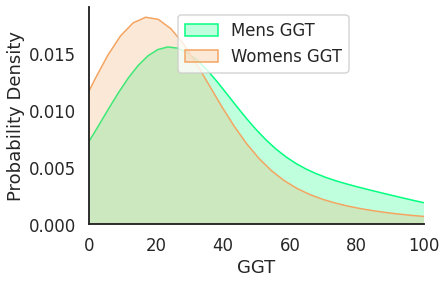

In [35]:
# Plotting the KDE Plot 
df = hepat

sns.kdeplot(df.loc[(df['Sex']=='m'), 
            'GGT'], color='springgreen', shade=True, Label='Mens GGT')

sns.kdeplot(df.loc[(df['Sex']=='f'), 
            'GGT'], color='sandybrown', shade=True, Label='Womens GGT')

plt.rcParams['figure.figsize'] = (12,6)

plt.xlim([0, 100])  
# Setting the X and Y Label 
plt.xlabel('GGT') 
plt.ylabel('Probability Density')
sns.despine()
plt.legend(loc='upper right', bbox_to_anchor=(0.8, 1));

<u>On the Aspartate Transaminase (AST) parameter</u> : 

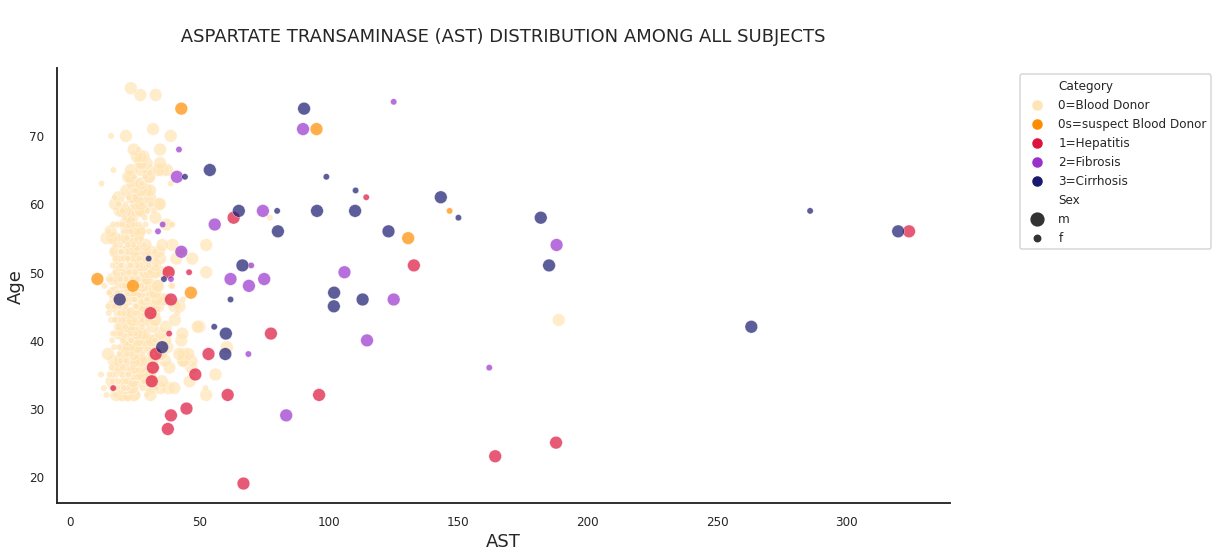

In [36]:

sns.set(style='white', context='talk')
plt.figure(figsize=(16, 8))
u = sns.scatterplot(data=hepat, x='AST', y='Age', 
                alpha=0.7, hue='Category', palette = ['moccasin', 'darkorange', 'crimson', 'darkorchid', 'midnightblue'], size='Sex')

plt.title("\n ASPARTATE TRANSAMINASE (AST) DISTRIBUTION AMONG ALL SUBJECTS \n")

u.tick_params(axis = 'both', which = 'major', labelsize = 12)


sns.despine()
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), fontsize=12);

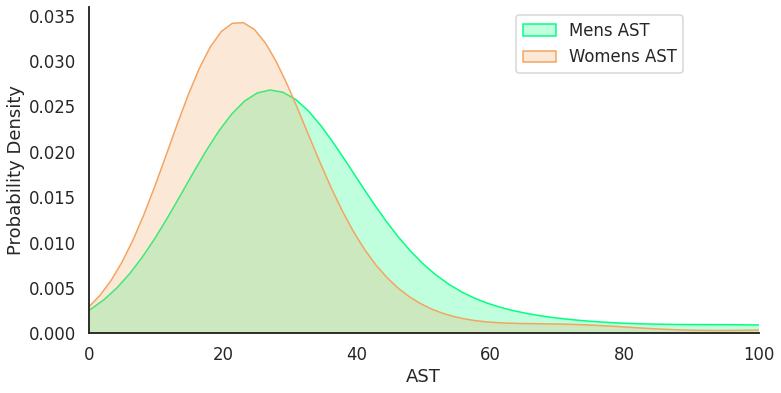

In [37]:
df = hepat
sns.kdeplot(df.loc[(df['Sex']=='m'), 
            'AST'], color='springgreen', shade=True, Label='Mens AST')

sns.kdeplot(df.loc[(df['Sex']=='f'), 
            'AST'], color='sandybrown', shade=True, Label='Womens AST')

plt.xlim([0, 100])  
# Setting the X and Y Label 
plt.xlabel('AST') 
plt.ylabel('Probability Density')
sns.despine()
plt.legend(loc='upper right', bbox_to_anchor=(0.9, 1));

<u>On the Creatinine (CREA) parameter</u> : 


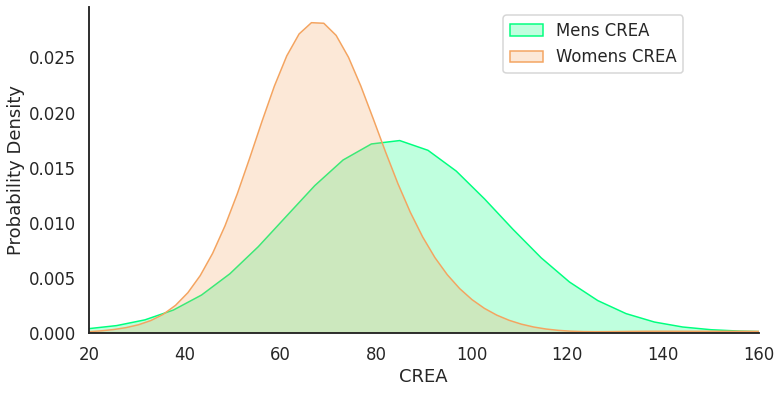

In [38]:
df = hepat
sns.kdeplot(df.loc[(df['Sex']=='m'), 
            'CREA'], color='springgreen', shade=True, Label='Mens CREA')

sns.kdeplot(df.loc[(df['Sex']=='f'), 
            'CREA'], color='sandybrown', shade=True, Label='Womens CREA')

plt.xlim([20, 160])  
# Setting the X and Y Label 
plt.xlabel('CREA') 
plt.ylabel('Probability Density')
sns.despine()
plt.legend(loc='upper right', bbox_to_anchor=(0.9, 1));

**Relatively to hepatic blood test, and for each of these parameters, there is a biological bias with gender, but not with age <br>**
**--> We will take account of Sex factor it in the data cleaning process** <br>
--> We won't take account of Age factor

## **4/ Cleaning**

We will now replace NaN values, according to the previous learnings

In [39]:
#### IDENTIFY THE ROWS WITH NaN VALUES
hepat[hepat.isna().any(axis=1)]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
122,0=Blood Donor,43,m,48.6,45.0,10.5,40.5,5.3,7.09,NaN,63.0,25.1,70.0
320,0=Blood Donor,32,f,47.4,52.5,19.1,17.1,4.6,10.19,NaN,63.0,23.0,72.2
330,0=Blood Donor,33,f,42.4,137.2,14.2,13.1,3.4,8.23,NaN,48.0,25.7,74.4
414,0=Blood Donor,46,f,42.9,55.1,15.2,29.8,3.6,8.37,NaN,61.0,29.0,71.9
425,0=Blood Donor,48,f,45.6,107.2,24.4,39.0,13.8,9.77,NaN,88.0,38.0,75.1
434,0=Blood Donor,48,f,46.8,93.3,10.0,23.2,4.3,12.41,NaN,52.0,23.9,72.4
499,0=Blood Donor,57,f,48.4,94.4,2.5,39.6,2.3,8.84,NaN,82.0,6.4,76.8
541,1=Hepatitis,38,m,45.0,56.3,NaN,33.1,7.0,9.58,6.0,77.9,18.9,63.0
542,1=Hepatitis,19,m,41.0,NaN,87.0,67.0,12.0,7.55,3.9,62.0,65.0,75.0
546,1=Hepatitis,29,m,49.0,NaN,53.0,39.0,15.0,8.79,3.6,79.0,37.0,90.0


We don't have much values in the hepaticly ill categories (1, 2 and 3) <br>
**So we have to replace them with the closest estimation possible, instead of droping** it. <br>
**--> Given what we previously state, we will make those assessments relatively to the illness and sex category**

In [40]:
#X = hepat.loc[:,['Category', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', None)


############################### CIRRHOSIS MEAN REPLACEMENT / SEX

##### GLOBAL CIR
whole_cir = hepat[hepat['Category']=="3=Cirrhosis"].copy()
#print(whole_cir)
#cir_M = hepat[hepat['Category']=="3=Cirrhosis"]

print('\n', '\n')


##### MALE CIR REPLACE
whole_cir_m = whole_cir[whole_cir['Sex']=="m"].copy()
whole_cir_m = whole_cir_m.fillna(whole_cir_m.mean())
whole_cir_m[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']] = whole_cir_m[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].astype(int)

#print(whole_cir_m)

print('\n', '\n')

##### FEMALE CIR REPLACE 
whole_cir_f = whole_cir[whole_cir['Sex']=="f"].copy()
#whole_cir_f

whole_cir_f = whole_cir_f.fillna(whole_cir_f.mean())
whole_cir_f[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']] = whole_cir_f[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].astype(int)
#print(whole_cir_f)

print('\n', '\n')

#### ACTUAL REPLACE
whole_cir_ok = pd.concat([whole_cir_m, whole_cir_f])
#print(whole_cir_ok)

hepat[hepat['Category']=="3=Cirrhosis"] = whole_cir_ok

#### CHECK
hepat[hepat['Category']=="3=Cirrhosis"]

################# FILL NaN WITH MOST PRECISE DATAS POSSIBLE (SAME SEX + CATEGORY)

#### CIRRHOSIS / M : 
#whole_cir_m = whole_cir_m.fillna(whole_cir_m.mean())
#whole_cir_m[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']] = whole_cir_m[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].astype(int)
#print(whole_cir_m)
#print('\n')
#test_cir_m = hepat[hepat['Category']=="3=Cirrhosis"]
#print(test_cir_m[test_cir_m['Sex']=="m"])


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
586,3=Cirrhosis,38,m,44.0,76.0,94.0,60.0,12.0,4.0,3.0,61.0,99.0,77.0
587,3=Cirrhosis,39,m,34.0,137.0,4.0,35.0,9.0,3.0,4.0,519.0,133.0,57.0
588,3=Cirrhosis,41,m,31.0,85.0,4.0,60.0,200.0,1.0,5.0,106.0,151.0,71.0
589,3=Cirrhosis,42,m,36.0,69.0,14.0,263.0,40.0,3.0,3.0,49.0,61.0,68.0
590,3=Cirrhosis,45,m,29.0,11.0,7.0,101.0,31.0,1.0,3.0,76.0,65.0,70.0
591,3=Cirrhosis,46,m,20.0,76.0,62.0,113.0,254.0,1.0,3.0,114.0,138.0,68.0
592,3=Cirrhosis,46,m,35.0,109.0,2.0,19.0,11.0,7.0,4.0,1079.0,105.0,69.0
593,3=Cirrhosis,47,m,42.0,76.0,159.0,102.0,11.0,6.0,5.0,58.0,201.0,79.0
594,3=Cirrhosis,51,m,39.0,66.0,29.0,185.0,19.0,2.0,3.0,58.0,399.0,79.0
595,3=Cirrhosis,51,m,33.0,29.0,4.0,66.0,91.0,4.0,4.0,75.0,28.0,62.0


In [41]:

############################### FIBROSIS MEAN REPLACEMENT / SEX

##### GLOBAL FIB
whole_fib = hepat[hepat['Category']=="2=Fibrosis"].copy()

##### MALE FIB REPLACE
whole_fib_m = whole_fib[whole_fib['Sex']=="m"].copy()
whole_fib_m = whole_fib_m.fillna(whole_fib_m.mean())
whole_fib_m[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']] = whole_fib_m[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].astype(int)

##### FEMALE FIB REPLACE 
whole_fib_f = whole_fib[whole_fib['Sex']=="f"].copy()
whole_fib_f = whole_fib_f.fillna(whole_fib_f.mean())
whole_fib_f[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']] = whole_fib_f[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].astype(int)


#### ACTUAL REPLACE
whole_fib_ok = pd.concat([whole_fib_m, whole_fib_f])
hepat[hepat['Category']=="2=Fibrosis"] = whole_fib_ok

#### CHECK
hepat[hepat['Category']=="2=Fibrosis"]



,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
565,2=Fibrosis,29,m,41.0,43.0,2.0,83.0,6.0,11.0,5.0,55.0,130.0,66.0
566,2=Fibrosis,40,m,39.0,43.0,23.0,114.0,11.0,9.0,4.0,70.0,127.0,81.0
567,2=Fibrosis,46,m,45.0,26.0,23.0,125.0,17.0,6.0,4.0,60.0,72.0,73.0
568,2=Fibrosis,48,m,49.0,45.0,19.0,69.0,30.0,7.0,4.0,76.0,28.0,72.0
569,2=Fibrosis,49,m,39.0,37.0,118.0,62.0,10.0,7.0,3.0,72.0,74.0,81.0
570,2=Fibrosis,49,m,46.0,37.0,114.0,75.0,16.0,10.0,5.0,72.0,59.0,82.0
571,2=Fibrosis,50,m,42.0,37.0,258.0,106.0,15.0,8.0,4.0,77.0,80.0,84.0
572,2=Fibrosis,53,m,46.0,37.0,34.0,43.0,14.0,8.0,4.0,112.0,203.0,76.0
573,2=Fibrosis,54,m,41.0,41.0,41.0,187.0,21.0,8.0,5.0,91.0,104.0,79.0
574,2=Fibrosis,57,m,47.0,29.0,10.0,55.0,12.0,6.0,4.0,70.0,69.0,80.0


In [42]:
############################### HEPATITIS MEAN REPLACEMENT / SEX

##### GLOBAL HEP
whole_hep = hepat[hepat['Category']=="1=Hepatitis"].copy()

##### MALE HEP REPLACE
whole_hep_m = whole_hep[whole_hep['Sex']=="m"].copy()
whole_hep_m = whole_hep_m.fillna(whole_hep_m.mean())
whole_hep_m[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']] = whole_hep_m[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].astype(int)

##### FEMALE HEP REPLACE 
whole_hep_f = whole_hep[whole_hep['Sex']=="f"].copy()
whole_hep_f = whole_hep_f.fillna(whole_hep_f.mean())
whole_hep_f[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']] = whole_hep_f[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].astype(int)

#### ACTUAL REPLACE
whole_hep_ok = pd.concat([whole_hep_m, whole_hep_f])
hepat[hepat['Category']=="1=Hepatitis"] = whole_hep_ok

#### CHECK
hepat[hepat['Category']=="1=Hepatitis"]



,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
541,1=Hepatitis,38,m,45.0,56.0,30.0,33.0,7.0,9.0,6.0,77.0,18.0,63.0
542,1=Hepatitis,19,m,41.0,44.0,87.0,67.0,12.0,7.0,3.0,62.0,65.0,75.0
543,1=Hepatitis,23,m,47.0,19.0,38.0,164.0,17.0,7.0,3.0,79.0,90.0,70.0
544,1=Hepatitis,25,m,42.0,38.0,63.0,187.0,14.0,6.0,4.0,66.0,40.0,70.0
545,1=Hepatitis,27,m,45.0,27.0,10.0,37.0,10.0,8.0,3.0,55.0,35.0,74.0
546,1=Hepatitis,29,m,49.0,44.0,53.0,39.0,15.0,8.0,3.0,79.0,37.0,90.0
547,1=Hepatitis,30,m,45.0,44.0,66.0,45.0,14.0,12.0,6.0,86.0,43.0,77.0
548,1=Hepatitis,32,m,45.0,34.0,44.0,96.0,16.0,10.0,6.0,81.0,48.0,82.0
549,1=Hepatitis,32,m,41.0,34.0,12.0,60.0,6.0,13.0,5.0,45.0,33.0,71.0
550,1=Hepatitis,34,m,46.0,36.0,7.0,31.0,9.0,9.0,5.0,82.0,34.0,71.0


In [43]:
#### FIND THE LAST REMAINING NaN VALUES 
select = hepat.loc[hepat.isnull().any(axis=1)].copy()
#print(select)

#### CHOL VALUES ON NON HEPATIC DISEASE, SO WE DROP THOSES 7 VALUES 
hepat_2 = hepat.dropna().copy()

#### PROCEED AND CHECK
hepat = hepat_2
print("\n", "Check if ther still is null values in the dataframe:", "\n", "\n", hepat[hepat.isna().any(axis=1)])
print("\n")
print("\n", "Check final Dataframe sample : ", "\n", "\n", hepat.sample(10))


 Check if ther still is null values in the dataframe: 
 
 Empty DataFrame
Columns: [Category, Age, Sex, ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT]
Index: []



 Check final Dataframe sample :  
 
           Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA  \
428  0=Blood Donor   48   f  32.0  66.3  14.2  21.3   5.5   4.72  5.23   41.0   
174  0=Blood Donor   47   m  55.4  61.2  25.4  32.9  28.3   8.39  5.25   96.0   
208  0=Blood Donor   51   m  36.8  98.5  25.5  27.7   5.0   9.49  6.08   89.0   
444  0=Blood Donor   49   f  34.9  37.9  15.3  19.4   7.1   5.30  5.88   83.0   
72   0=Blood Donor   38   m  39.9  62.9  71.7  43.9  10.4  10.90  7.01   99.0   
103  0=Blood Donor   41   m  42.3  55.9  19.6  18.9  10.9   7.15  3.29   86.0   
493  0=Blood Donor   56   f  39.5  86.9  22.5  22.2   4.7   9.40  6.02   66.0   
196  0=Blood Donor   50   m  46.6  66.3  19.5  23.7  18.5   8.27  5.73   92.0   
58   0=Blood Donor   37   m  47.9  68.8  40.3  46.9   6.0   9.7

In [44]:
print(hepat['Category'].value_counts())


0=Blood Donor             526
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64


## **B] FIRST ANALYSIS : HEPATICLY ILL VS HEPATICLY SANE POPULATION**


In [45]:
#### DATAFRAME PREPARATION FOR DATAVIZ
result = pd.concat([HC_neg_mean, HC_pos_mean], axis=1, join='inner')
result = result.reset_index()
result.columns = ["index", "HC_neg_mean", "HC_pos_mean"]
result


,index,HC_neg_mean,HC_pos_mean
0,Age,47.131332,48.426667
1,ALB,42.238274,38.797297
2,ALP,68.365103,62.733333
3,ALT,26.631520,34.586486
4,AST,26.549156,89.945333
5,BIL,8.527580,32.413333
6,CHE,8.398086,6.831867
7,CHOL,5.494316,4.535139
8,CREA,78.977486,99.533333
9,GGT,29.036773,103.676000


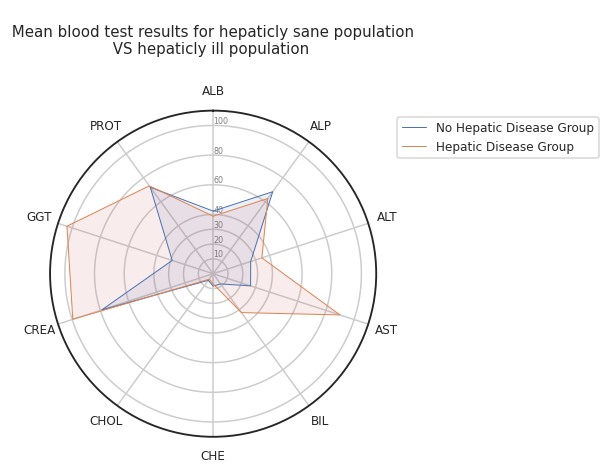

In [46]:
##### KIVIAT DIAGRAMM // 


# Math Library
from math import pi

 
# ------- PART 1: Create background
 
# number of variable
categories=list(all_means_test)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, fontsize = 12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30, 40, 60, 80, 100], ["10","20","30", "40", "60", "80", "100"], color="grey", size=8)
plt.ylim(0,110)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=all_means_test.loc[0].drop('index').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="No Hepatic Disease Group")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=all_means_test.loc[1].drop('index').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Hepatic Disease Group")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1), fontsize=12)

# Title
ax.set_title("\n Mean blood test results for hepaticly sane population \n VS hepaticly ill population  \n \n", fontsize=15)

plt.show()

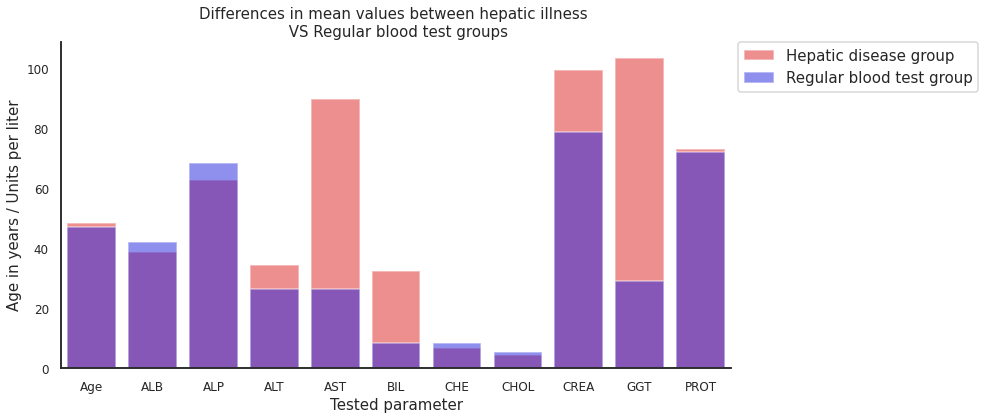

In [47]:
#### DATAVIZ PLOTTING
g = sns.barplot(y='HC_pos_mean', x='index', data=result, color='red', label='Hepatic disease group', alpha=0.5)
g = sns.barplot(y='HC_neg_mean', x='index', data=result, color='blue', label='Regular blood test group', alpha=0.5)

g.tick_params(axis = 'both', which = 'major', labelsize = 12)

plt.title("Differences in mean values between hepatic illness \n VS Regular blood test groups", fontsize=15)
plt.xlabel('Tested parameter', fontsize=15)
plt.ylabel('Age in years / Units per liter', fontsize=15)
plt.rcParams['figure.figsize'] = (12,6)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, fontsize=15)
sns.despine()
plt.show()

#### **Aspartate Transaminase (AST), Gamma-Glutamyl Transferase (GGT), and Bilirubin (BIL) are the most affected variables when investigating the hepatic illness**
#### In a less significative extend, Alanine Transaminase (ALT) and Creatinine (CREA) are significatively higher for hepatic illness group

### ***DRIVING QUESTION :*** <br>
#### If AST and GGT seems relevant to indicate an hepatic disorder, <br> *are they still a good match to differenciate between Hepatitis C, Fibrosis, and Cirrhosis* ?

## **C] DIFFERENCIATION OF THE RESULTS BY HEPATIC DISEASE**

## **1/ Hepatitis C**



In [48]:
#ill_diff.head()

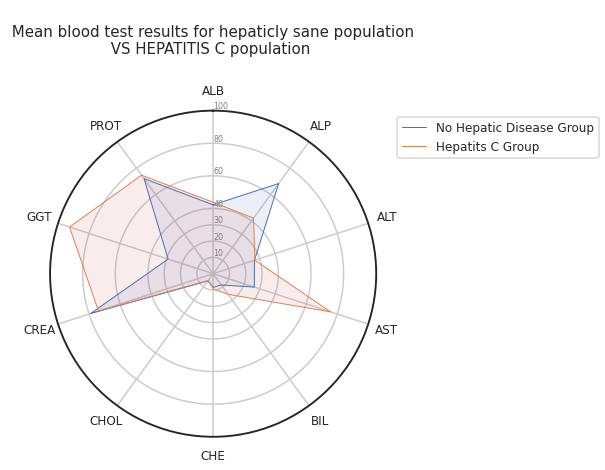

In [49]:
# Math Library
from math import pi

 
# ------- PART 1: Create background
 
# number of variable
categories=list(all_means_test)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30, 40, 60, 80, 100], ["10","20","30", "40", "60", "80", "100"], color="grey", size=8)
plt.ylim(0,100)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=all_means_test.loc[0].drop('index').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="No Hepatic Disease Group")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=all_means_test.loc[2].drop('index').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Hepatits C Group")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1), fontsize=12)

# Title
ax.set_title("\n Mean blood test results for hepaticly sane population \n VS HEPATITIS C population  \n \n", fontsize=15)

plt.show()

**Let's investigate further the results with a bar chart, for a more precise display of numeric values :**

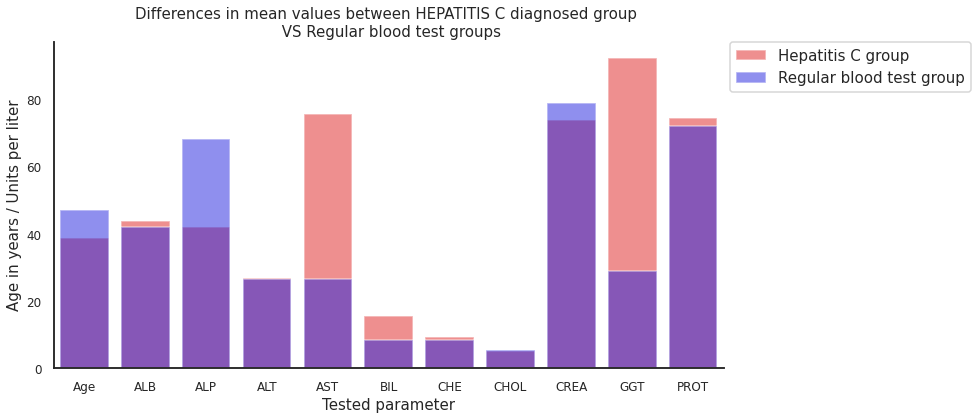

In [50]:
#### DATAVIZ PLOTTING
g = sns.barplot(y=ill_diff['Hep_mean'], x='index', data=result, color='red', label='Hepatitis C group', alpha=0.5)
g = sns.barplot(y=result['HC_neg_mean'], x='index', data=result, color='blue', label='Regular blood test group', alpha=0.5)

g.tick_params(axis = 'both', which = 'major', labelsize = 12)

plt.title("Differences in mean values between HEPATITIS C diagnosed group \n VS Regular blood test groups", fontsize=15)
plt.xlabel('Tested parameter', fontsize=15)
plt.ylabel('Age in years / Units per liter', fontsize=15)
plt.rcParams['figure.figsize'] = (12,6)

plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, fontsize=15)

sns.despine()

plt.show()

#### **For diagnosed Hepatitis C patients, <br> 4 parameters emerged as significantly distinct from their mean in hepaticly sane population :** 
- A lack of Alkaline phosphatase (**ALP**)
- An excess of Aspartate Transaminase (**AST**)
- An excess of Bilirubin (**BIL**)
- An excess of Gamma-Glutamyl Transferase (**GGT**)


## **2/ Fibrosis**

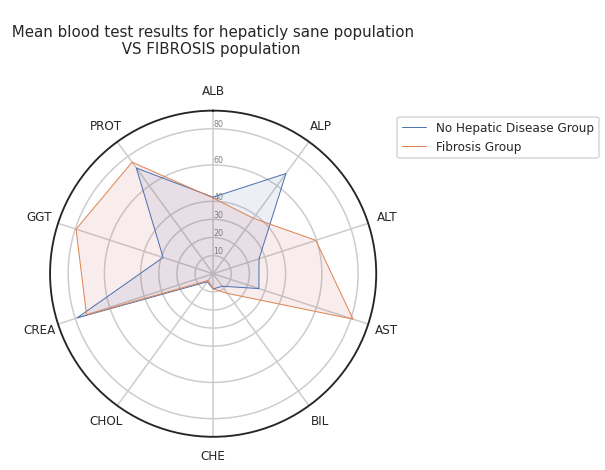

In [51]:
# Math Library
from math import pi

 
# ------- PART 1: Create background
 
# number of variable
categories=list(all_means_test)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30, 40, 60, 80], ["10","20","30", "40", "60", "80"], color="grey", size=8)
plt.ylim(0,90)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=all_means_test.loc[0].drop('index').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="No Hepatic Disease Group")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=all_means_test.loc[3].drop('index').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Fibrosis Group")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1), fontsize=12)

# Title
ax.set_title("\n Mean blood test results for hepaticly sane population \n VS FIBROSIS population  \n \n", fontsize=15)

plt.show()

**Bar chart for more precise evaluation of the lowest values : Bilirubin (BIL), Acetylcholinesterase (CHE), and Cholesterol (CHOL)**

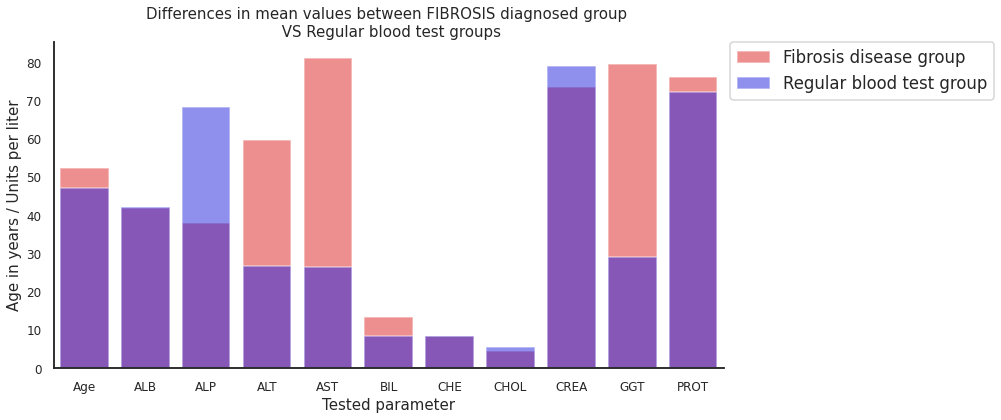

In [52]:
#### DATAVIZ PLOTTING
g = sns.barplot(y=ill_diff['Fib_mean'], x='index', data=result, color='red', label='Fibrosis disease group', alpha=0.5)
g = sns.barplot(y=result['HC_neg_mean'], x='index', data=result, color='blue', label='Regular blood test group', alpha=0.5)

g.tick_params(axis = 'both', which = 'major', labelsize = 12)

plt.title("Differences in mean values between FIBROSIS diagnosed group \n VS Regular blood test groups", fontsize=15)
plt.xlabel('Tested parameter', fontsize=15)
plt.ylabel('Age in years / Units per liter', fontsize=15)
plt.rcParams['figure.figsize'] = (12,6)
sns.despine()

plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

#### **For diagnosed Fibrosis patients, <br> 5 parameters emerged as significantly distinct from their mean in hepaticly sane population :** 
- A lack of Alkaline phosphatase (**ALP**)
- An excess of Alanine Transaminase (**ALT**)
- An excess of Aspartate Transaminase (**AST**)
- An excess of Bilirubin (**BIL**)
- An excess of Gamma-Glutamyl Transferase (**GGT**)



## **3/ Cirrhosis**

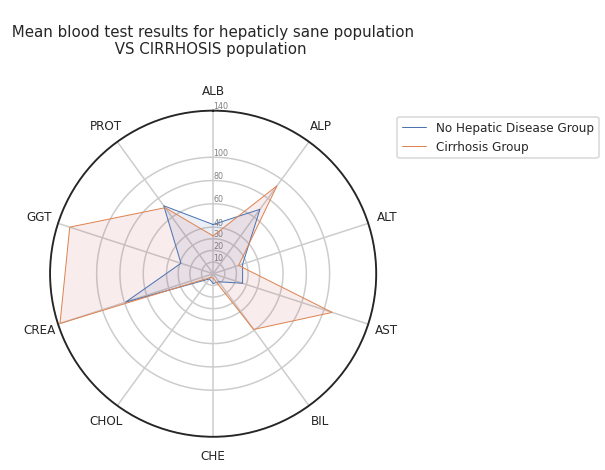

In [53]:
# Math Library
from math import pi

 
# ------- PART 1: Create background
 
# number of variable
categories=list(all_means_test)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, fontsize=12)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30, 40, 60, 80, 100, 140], ["10","20","30", "40", "60", "80", "100", "140"], color="grey", size=8)
plt.ylim(0,140)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=all_means_test.loc[0].drop('index').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="No Hepatic Disease Group")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=all_means_test.loc[4].drop('index').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cirrhosis Group")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1), fontsize=12)

# Title
ax.set_title("\n Mean blood test results for hepaticly sane population \n VS CIRRHOSIS population  \n \n", fontsize=15)

plt.show()

**Bar chart for more precise evaluation of the lowest values : Alanine Transaminase (ALT), Acetylcholinesterase (CHE), and Cholesterol (CHOL)**

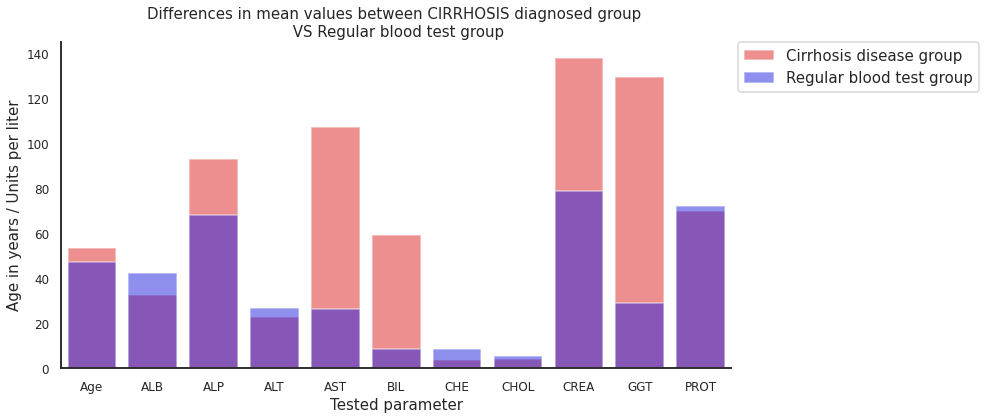

In [54]:
#### DATAVIZ PLOTTING

g = sns.barplot(y=ill_diff['Cir_mean'], x='index', data=result, color='red', label='Cirrhosis disease group', alpha=0.5)
g = sns.barplot(y=result['HC_neg_mean'], x='index', data=result, color='blue', label='Regular blood test group', alpha=0.5)

g.tick_params(axis = 'both', which = 'major', labelsize = 12)

plt.title("Differences in mean values between CIRRHOSIS diagnosed group \n VS Regular blood test group", fontsize=15)
plt.xlabel('Tested parameter', fontsize=15)
plt.ylabel('Age in years / Units per liter', fontsize=15)
plt.rcParams['figure.figsize'] = (12,6)
sns.despine()

plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, fontsize=15)
plt.show()

#### **For diagnosed Cirrhosis patients <br> 5 parameters emerged as significantly distinct from their mean in hepaticly sane population :**

- An excess of Alkaline phosphatase (**ALP**)
- An excess of Aspartate Transaminase (**AST**)
- An excess of Bilirubin (**BIL**)
- An excess of Creatine (**CREA**)
- An excess of Gamma-Glutamyl Transferase (**GGT**)



### ***DRIVING QUESTION :*** 

####**Given the relevant part of the previous results (focused on specific illness), 3 questions arise :**

####- For HEPATITIS C : Can we precisely diagnose HC with **regular ALT** and an **excess of AST**  ? 
####- For FIBROSIS : Can we precisely diagnose F with **ALP deficit** and an **excess of ALT**  ? 
####- For CIRRHOSIS : Can we precisely diagnose C with an **excess of CREA** ?


# **MACHINE LEARNING MODELS**



In [55]:
### LOAD LIBRARIES

from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy

In [56]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [57]:
#### Set Meta Paramater
pd.set_option('display.max_rows', 20)


In [58]:
X = hepat.loc[:,['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]


In [59]:
##### GET THE SUSPECT CATEGORY OUT OF THE DATASET
X = X[X.Category != '0s=suspect Blood Donor'].copy()
X

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,3=Cirrhosis,62,f,32.0,416.0,5.0,110.0,50.0,5.00,6.00,55.0,650.0,68.0
612,3=Cirrhosis,64,f,24.0,102.0,2.0,44.0,20.0,1.00,3.00,63.0,35.0,71.0
613,3=Cirrhosis,64,f,29.0,87.0,3.0,99.0,48.0,1.00,3.00,66.0,64.0,82.0
614,3=Cirrhosis,46,f,33.0,126.0,39.0,62.0,20.0,3.00,4.00,52.0,50.0,71.0


### **1/ Encoding Categorical Values**

In [60]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
X["Category_encode"] = ord_enc.fit_transform(X[["Category"]])
print(X[["Category", "Category_encode"]].sample(20))

print('\n')
X["Age_encode"] = ord_enc.fit_transform(X[["Age"]])
print(X[["Age", "Age_encode"]].sample(20))

print('\n')
X["Sex_encode"] = ord_enc.fit_transform(X[["Sex"]])
print(X[["Sex", "Sex_encode"]].sample(20))

          Category  Category_encode
552    1=Hepatitis              1.0
290  0=Blood Donor              0.0
108  0=Blood Donor              0.0
405  0=Blood Donor              0.0
120  0=Blood Donor              0.0
558    1=Hepatitis              1.0
107  0=Blood Donor              0.0
386  0=Blood Donor              0.0
260  0=Blood Donor              0.0
205  0=Blood Donor              0.0
65   0=Blood Donor              0.0
445  0=Blood Donor              0.0
564    1=Hepatitis              1.0
294  0=Blood Donor              0.0
491  0=Blood Donor              0.0
1    0=Blood Donor              0.0
164  0=Blood Donor              0.0
62   0=Blood Donor              0.0
578     2=Fibrosis              2.0
399  0=Blood Donor              0.0


     Age  Age_encode
301   65        39.0
508   57        31.0
557   50        24.0
387   43        17.0
436   48        22.0
400   45        19.0
56    37        11.0
453   51        25.0
90    39        13.0
244   55        29.0
137   44   

In [61]:
X.sample(5)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_encode,Age_encode,Sex_encode
559,1=Hepatitis,56,m,37.0,114.0,27.0,324.0,67.0,5.00,3.00,97.0,392.0,77.0,1.0,30.0,1.0
303,0=Blood Donor,65,m,43.6,104.0,32.3,34.2,7.7,8.23,4.69,89.0,20.8,75.5,0.0,39.0,1.0
110,0=Blood Donor,42,m,44.1,46.8,23.8,19.4,7.0,10.83,6.28,95.0,19.7,73.0,0.0,16.0,1.0
506,0=Blood Donor,57,f,48.0,56.9,8.6,20.1,4.4,8.14,6.90,63.0,14.8,73.1,0.0,31.0,0.0
468,0=Blood Donor,52,f,41.7,58.3,22.9,26.7,11.4,9.17,4.33,75.0,14.5,77.1,0.0,26.0,0.0


### **2/ Scaling method selection for predictive model**

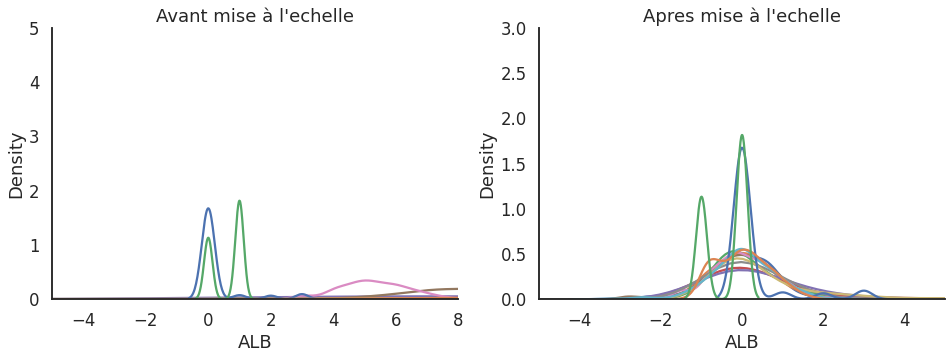

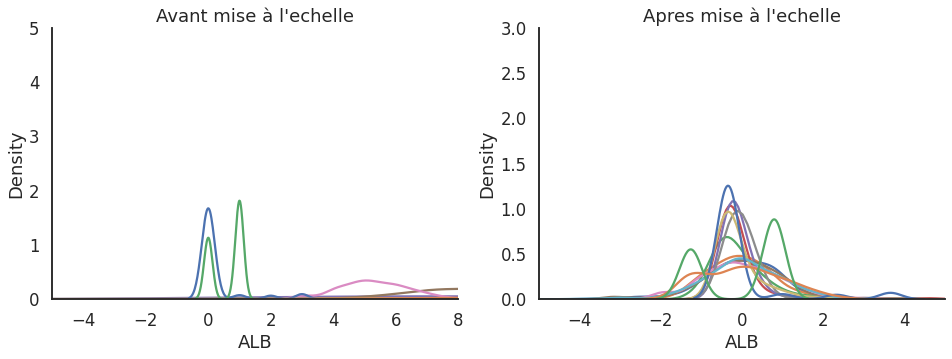

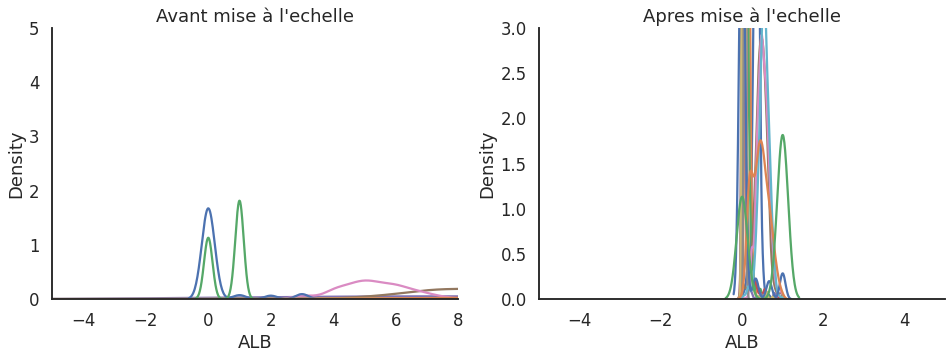

In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

def plotGraph(pdf, pscaled_df):
    fig, (a, b) = plt.subplots(ncols=2, figsize=(16, 5))
    a.set_title("Avant mise à l'echelle")
    a.set(xlim=(-5, 8))
    a.set(ylim=(0, 5))
    for col in pdf.columns:
        sns.kdeplot(pdf[col], ax=a)
        
    b.set_title("Apres mise à l'echelle")
    b.set(xlim=(-5, 5))
    b.set(ylim=(0, 3))
    for col in pdf.columns:
        sns.kdeplot(pscaled_df[col], ax=b)

    sns.despine()
    plt.show()


scaler = RobustScaler()
keepCols = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Category_encode', 'Age_encode', 'Sex_encode']
scaled_df = scaler.fit_transform(X[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
plotGraph(X[keepCols], scaled_df)

scaler = StandardScaler()
keepCols = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Category_encode', 'Age_encode', 'Sex_encode']
scaled_df = scaler.fit_transform(X[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
plotGraph(X[keepCols], scaled_df)

scaler = MinMaxScaler()
keepCols = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Category_encode', 'Age_encode', 'Sex_encode']
scaled_df = scaler.fit_transform(X[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
plotGraph(X[keepCols], scaled_df)


#scaler = StandardScaler()
#keepCols = ['A', 'B', 'C']
#scaled_df = scaler.fit_transform(df[keepCols])
#scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
#plotGraph(df[keepCols], scaled_df)

**--> Standard scaler is visibly the most efficient**

In [63]:
scaler = StandardScaler()
keepCols = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Category_encode', 'Age_encode', 'Sex_encode']
scaled_df = scaler.fit_transform(X[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
#plotGraph(X[keepCols], scaled_df)

In [64]:
scaled_df['Category_encode'].value_counts()

-0.346374    526
 3.656913     30
 0.988055     24
 2.322484     21
Name: Category_encode, dtype: int64

In [65]:
scaled_df.sample(5)

,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_encode,Age_encode,Sex_encode
401,-0.877230,0.432048,-0.368048,-0.467980,-0.364942,-0.687858,-0.498259,-0.353825,-0.125872,-0.523631,-0.346374,-0.236728,-1.265595
405,-1.098679,-0.650976,-0.429155,-0.281339,-0.390126,0.167135,0.453790,-0.554191,-0.542129,-0.140315,-0.346374,-0.135104,-1.265595
200,-0.268245,0.127695,0.877589,-0.064101,-0.239024,-0.008363,-1.067788,-0.093349,-0.411689,-0.604329,-0.346374,0.271391,0.790142
228,1.337262,0.740355,0.054998,-0.321115,0.012814,-0.917356,-1.118791,-0.153458,-0.091344,0.727189,-0.346374,0.576263,0.790142
577,-1.246312,1.649463,-1.209441,-0.471039,-0.027480,-0.507859,-1.118791,19.983344,1.278274,-0.644678,3.656913,-0.135104,0.790142


### **3/ Testing the Creatinine Hypothesis on Cirrhosis prediction : Linear Regression** 

In [66]:
y = scaled_df["Category_encode"].copy()
#y = y.dropna()
print(y.value_counts())
#print(y.sample(20))

-0.346374    526
 3.656913     30
 0.988055     24
 2.322484     21
Name: Category_encode, dtype: int64


In [67]:
#scaled_df.drop(['Category'],axis=1,inplace=True)
#scaled_df.drop(['Category_encode'],axis=1,inplace=True)
#X = scaled_df.copy()
scaled_df
y = scaled_df['Category_encode']
y

0     -0.346374
1     -0.346374
2     -0.346374
3     -0.346374
4     -0.346374
         ...   
596    3.656913
597    3.656913
598    3.656913
599    3.656913
600    3.656913
Name: Category_encode, Length: 601, dtype: float64

In [68]:
scaled_df_selec = scaled_df[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Age_encode', 'Sex_encode']]
scaled_df_selec['CREA']

X = scaled_df_selec['CREA']


In [69]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(scaled_df['CREA'], scaled_df['Category_encode'], random_state=seed)

In [70]:
#### CHECK THE RIGHT NUMBER OF DIMENSIONS

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1) 

print(f"Train: {train.shape[0]} rows and {train.shape[1]} columns")
print(f"{train['Category_encode'].value_counts()}\n")

print(f"Test: {test.shape[0]} rows and {test.shape[1]} columns")
print(test['Category_encode'].value_counts())

Train: 450 rows and 2 columns
-0.346374    401
 0.988055     17
 2.322484     16
 3.656913     16
Name: Category_encode, dtype: int64

Test: 151 rows and 2 columns
-0.346374    125
 3.656913     14
 0.988055      7
 2.322484      5
Name: Category_encode, dtype: int64


In [71]:
X_train= X_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [72]:

# example of training a final regression model
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
# generate regression dataset
#X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=1)
# fit final model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
y_predicted = model.predict(X_test)

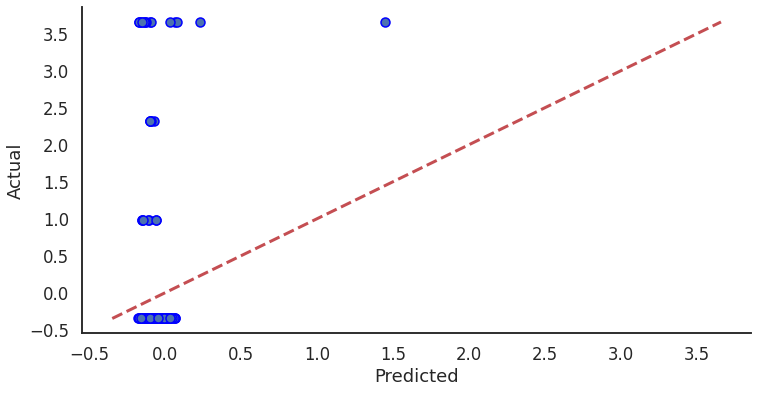

In [74]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
sns.despine()
plt.show()

**LINEAR REGRESSION ON CREATININE FAILS TO PREDICT CIRRHOSIS ACURATELY** <br>
--> It may be linked to the size of the dataset 

## **4/ Testing several classification models** 

In [75]:
X = hepat.loc[:,['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]


In [76]:
##### GET THE SUSPECT CATEGORY OUT OF THE DATASET
X = X[X.Category != '0s=suspect Blood Donor'].copy()
X

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,3=Cirrhosis,62,f,32.0,416.0,5.0,110.0,50.0,5.00,6.00,55.0,650.0,68.0
612,3=Cirrhosis,64,f,24.0,102.0,2.0,44.0,20.0,1.00,3.00,63.0,35.0,71.0
613,3=Cirrhosis,64,f,29.0,87.0,3.0,99.0,48.0,1.00,3.00,66.0,64.0,82.0
614,3=Cirrhosis,46,f,33.0,126.0,39.0,62.0,20.0,3.00,4.00,52.0,50.0,71.0


In [77]:
ord_enc = OrdinalEncoder()
X["Category_encode"] = ord_enc.fit_transform(X[["Category"]])
print(X[["Category", "Category_encode"]].sample(20), "\n")

X["Age_encode"] = ord_enc.fit_transform(X[["Age"]])
print(X[["Age", "Age_encode"]].sample(20), "\n")

X["Sex_encode"] = ord_enc.fit_transform(X[["Sex"]])
print(X[["Sex", "Sex_encode"]].sample(20), "\n")

          Category  Category_encode
219  0=Blood Donor              0.0
71   0=Blood Donor              0.0
447  0=Blood Donor              0.0
407  0=Blood Donor              0.0
223  0=Blood Donor              0.0
478  0=Blood Donor              0.0
282  0=Blood Donor              0.0
21   0=Blood Donor              0.0
382  0=Blood Donor              0.0
395  0=Blood Donor              0.0
91   0=Blood Donor              0.0
299  0=Blood Donor              0.0
63   0=Blood Donor              0.0
147  0=Blood Donor              0.0
244  0=Blood Donor              0.0
401  0=Blood Donor              0.0
65   0=Blood Donor              0.0
190  0=Blood Donor              0.0
479  0=Blood Donor              0.0
328  0=Blood Donor              0.0 

     Age  Age_encode
451   50        24.0
392   44        18.0
432   48        22.0
128   43        17.0
377   41        15.0
38    35         9.0
276   60        34.0
394   44        18.0
498   56        30.0
584   56        30.0
522   61   

In [78]:
test = X[X.columns[3:]]
test

,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_encode,Age_encode,Sex_encode
1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0.0,6.0,1.0
2,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0.0,6.0,1.0
3,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0.0,6.0,1.0
4,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0.0,6.0,1.0
5,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,32.0,416.0,5.0,110.0,50.0,5.00,6.00,55.0,650.0,68.0,3.0,36.0,0.0
612,24.0,102.0,2.0,44.0,20.0,1.00,3.00,63.0,35.0,71.0,3.0,38.0,0.0
613,29.0,87.0,3.0,99.0,48.0,1.00,3.00,66.0,64.0,82.0,3.0,38.0,0.0
614,33.0,126.0,39.0,62.0,20.0,3.00,4.00,52.0,50.0,71.0,3.0,20.0,0.0


In [79]:
y = test['Category_encode']
X = test[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Age_encode', 'Sex_encode']]

In [80]:
y

1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
      ... 
611    3.0
612    3.0
613    3.0
614    3.0
615    3.0
Name: Category_encode, Length: 601, dtype: float64

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.6,test_size=0.4, random_state=42)


### a) Support Vector Classification

In [82]:
model = svm.SVC()
model.fit(X_train,y_train)# now fit our model for training data
prediction = model.predict(X_test)# predict for the test data

metrics.accuracy_score(prediction,y_test)

print('\n', "Accuracy score :")
print(metrics.accuracy_score(prediction,y_test))

print('\n', "Confusion matrix :")
print(metrics.confusion_matrix(y_test,prediction))




 Accuracy score :
0.8838174273858921

 Confusion matrix :
[[204   0   0   1]
 [ 10   2   0   0]
 [  3   3   1   2]
 [  6   3   0   6]]


### b) K-Nearest Neighbors

In [83]:
#knn
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print('\n', "Accuracy score :")
print(metrics.accuracy_score(y_pred,y_test))

print('\n', "Confusion matrix :")
metrics.confusion_matrix(y_test,prediction)




 Accuracy score :
0.8755186721991701

 Confusion matrix :


array([[204,   0,   0,   1],
       [ 10,   2,   0,   0],
       [  3,   3,   1,   2],
       [  6,   3,   0,   6]])

### c) Naive Bayes Classification

In [84]:
#naive bayes
knn = GaussianNB()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print('\n', "Accuracy score :")
print(metrics.accuracy_score(y_pred,y_test))

print('\n', "Confusion matrix :")
metrics.confusion_matrix(y_test,prediction)




 Accuracy score :
0.8962655601659751

 Confusion matrix :


array([[204,   0,   0,   1],
       [ 10,   2,   0,   0],
       [  3,   3,   1,   2],
       [  6,   3,   0,   6]])

### d) Random Forest Classifier

In [85]:
model_RFC=RandomForestClassifier(n_estimators=200)
model_RFC.fit(X_train,y_train)# now fit our model for training data
prediction=model_RFC.predict(X_test)# predict for the test data

print('\n', "Accuracy score :")
print(metrics.accuracy_score(prediction,y_test))
print('\n', "Confusion matrix :")
print(metrics.confusion_matrix(y_test,prediction))



 Accuracy score :
0.9336099585062241

 Confusion matrix :
[[205   0   0   0]
 [  6   4   2   0]
 [  1   2   6   0]
 [  3   1   1  10]]


In [86]:
feature_imp = pd.Series(model_RFC.feature_importances_).sort_values(ascending=False)
print(feature_imp)

print('\n')
print('And (very) surprisingly :', "\n")
print(" 3 = AST\n 1 = ALP \n 5 = CHE \n 2 = ALT \n 8 = GGT \n 6 = CHOL \n 4 = BIL \n 10 = Age_encode \n 0 = ALB \n 7 = CREA \n 9 = PROT \n 11 = Sex_encode")

3     0.247123
1     0.114711
5     0.110927
2     0.100286
6     0.083685
8     0.078893
4     0.069328
10    0.054244
9     0.047328
0     0.047068
7     0.041264
11    0.005142
dtype: float64


And (very) surprisingly : 

 3 = AST
 1 = ALP 
 5 = CHE 
 2 = ALT 
 8 = GGT 
 6 = CHOL 
 4 = BIL 
 10 = Age_encode 
 0 = ALB 
 7 = CREA 
 9 = PROT 
 11 = Sex_encode



### **THE MOST RELEVANT FACTOR OF CLASSIFICATION FROM A HUMAN POINT OF VIEW :** 
### **"11 = Sex_encode"** 
(== male / female parameter) 
### **------------> IS THE LEAST RELEVANT ONE, FROM A LEARNING MACHINE PERSPECTIVE**




